In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%reload_ext autoreload
%autoreload 2

### Loading data

In [115]:
path="../data/diabetes.csv"
diabetes_df=pd.read_csv(path)

### splitting data

In [116]:
from sklearn.model_selection import train_test_split

diabetes_train,diabetes_test=train_test_split(diabetes_df,test_size=0.2,random_state=42)

In [117]:
diabetes_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56553 entries, 61789 to 15795
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       56553 non-null  float64
 1   HighBP                56553 non-null  float64
 2   HighChol              56553 non-null  float64
 3   CholCheck             56553 non-null  float64
 4   BMI                   56553 non-null  float64
 5   Smoker                56553 non-null  float64
 6   Stroke                56553 non-null  float64
 7   HeartDiseaseorAttack  56553 non-null  float64
 8   PhysActivity          56553 non-null  float64
 9   Fruits                56553 non-null  float64
 10  Veggies               56553 non-null  float64
 11  HvyAlcoholConsump     56553 non-null  float64
 12  AnyHealthcare         56553 non-null  float64
 13  NoDocbcCost           56553 non-null  float64
 14  GenHlth               56553 non-null  float64
 15  MentHlth            

In [118]:
diabetes_train.head(5)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
61789,1.0,1.0,0.0,1.0,25.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,4.0,0.0,3.0,0.0,1.0,11.0,4.0,6.0
46280,1.0,1.0,1.0,1.0,27.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,5.0,0.0,30.0,1.0,0.0,11.0,4.0,2.0
18465,0.0,1.0,0.0,1.0,27.0,1.0,0.0,0.0,1.0,0.0,...,1.0,1.0,4.0,10.0,27.0,1.0,0.0,8.0,5.0,5.0
45540,1.0,0.0,1.0,1.0,25.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,0.0,0.0,0.0,0.0,12.0,6.0,7.0
28119,0.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,2.0,1.0,0.0,5.0,2.0,2.0


### Visualizing Age Data

In [119]:
diabetes_train["Age"].describe()

count    56553.000000
mean         8.576769
std          2.852993
min          1.000000
25%          7.000000
50%          9.000000
75%         11.000000
max         13.000000
Name: Age, dtype: float64

In [120]:
age_count=diabetes_train["Age"].value_counts().sort_index()

age_count

Age
1.0      789
2.0     1129
3.0     1635
4.0     2231
5.0     2828
6.0     3713
7.0     5557
8.0     6907
9.0     8018
10.0    8716
11.0    6412
12.0    4295
13.0    4323
Name: count, dtype: int64

In [121]:
labels = ["18 to 24","25 to 29","30 to 34","35 to 39","40 to 44","45 to 49","50 to 54","55 to 59",
          "60 to 64","65 to 69","70 to 74","75 to 79","80 or older"]

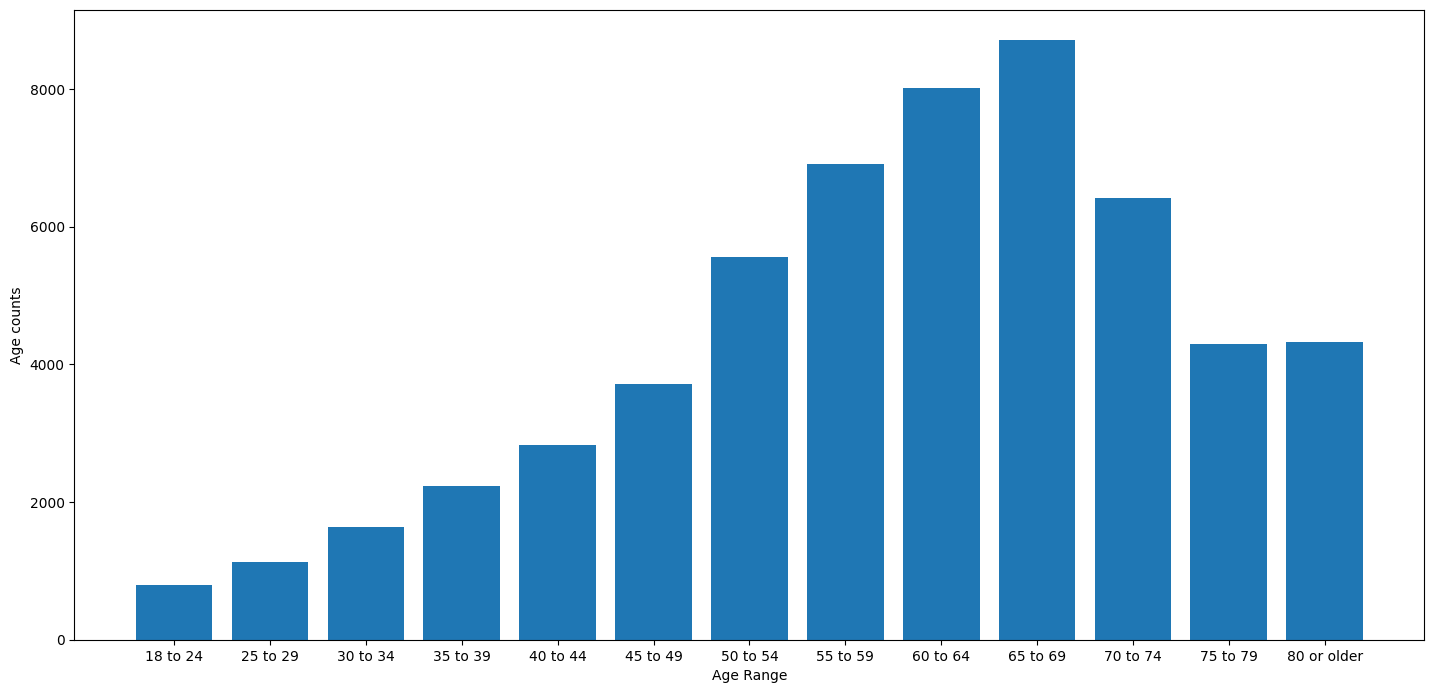

In [122]:
age_figer=plt.figure(figsize=(15,7),dpi=100)
age_axes=age_figer.add_axes([0.1,0.1,0.9,0.9])

age_axes.set_xlabel('Age Range')
age_axes.set_ylabel('Age counts')

age_axes.bar(labels,age_count.values)

plt.show()

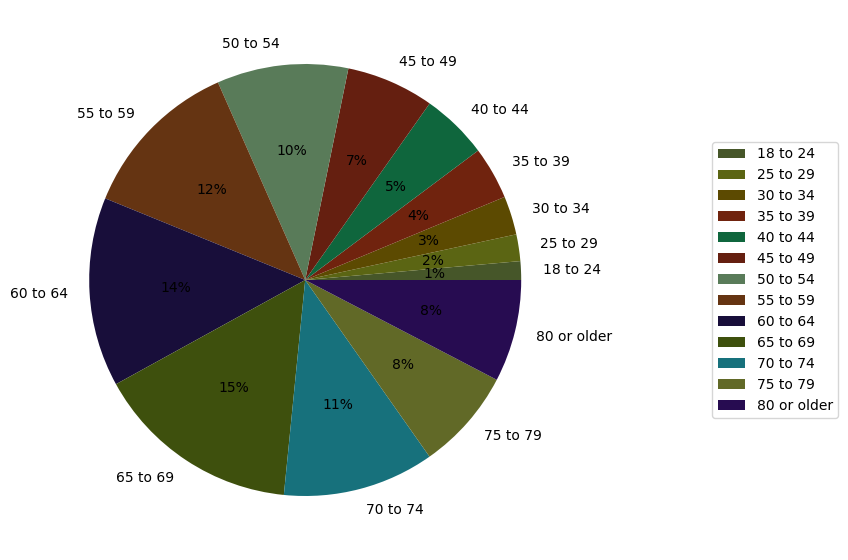

In [123]:
import random

age_figer=plt.figure(figsize=(10,6),dpi=100)
age_axes=age_figer.add_axes([0.1,0.1,0.9,0.9])

colors=[]
for i in range(age_count.size):
    rgb=(random.uniform(0,0.5),random.uniform(0,0.5),random.uniform(0,0.5))
    colors.append(rgb)

wedges, texts, autotexts=age_axes.pie(age_count.values,labels=labels,
                                      colors=colors,autopct="%1.0f%%") #,textprops=dict(color="w")
plt.legend(wedges,labels,loc="right",bbox_to_anchor=(1,0,0.5,1))

plt.show()

In [124]:
age_diabetes_distribution =(
    diabetes_train.groupby(by=["Age","Diabetes_binary"])["Diabetes_binary"]
    .count()
    .unstack(fill_value=0)
)

age_diabetes_distribution

Diabetes_binary,0.0,1.0
Age,,
1.0,728,61
2.0,1013,116
3.0,1383,252
4.0,1744,487
5.0,1981,847
6.0,2337,1376
7.0,3052,2505
8.0,3473,3434
9.0,3457,4561


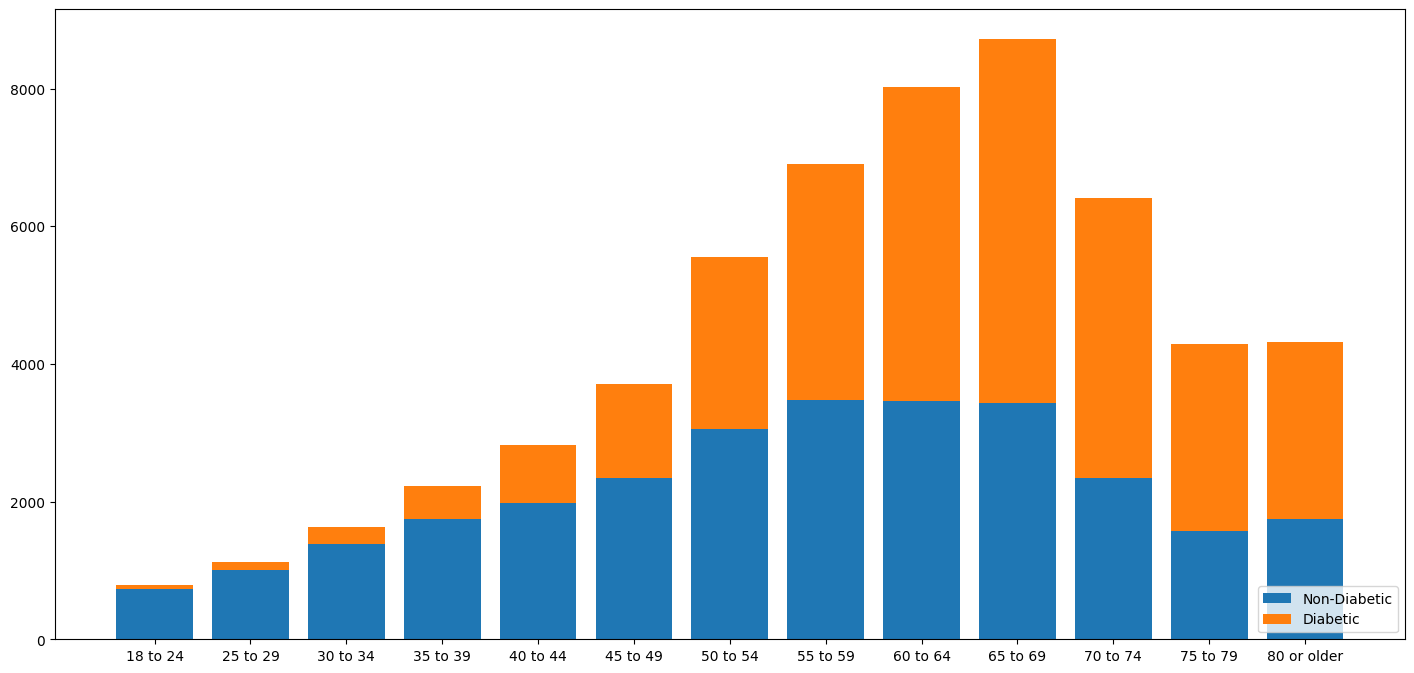

In [125]:
age_figer=plt.figure(figsize=(15,7),dpi=100)
age_axes=age_figer.add_axes([0.1,0.1,0.9,0.9])

age_axes.bar(labels,age_diabetes_distribution [0],label="Non-Diabetic")
age_axes.bar(labels,age_diabetes_distribution [1],label="Diabetic",bottom=age_diabetes_distribution [0])
plt.legend(loc="lower right")


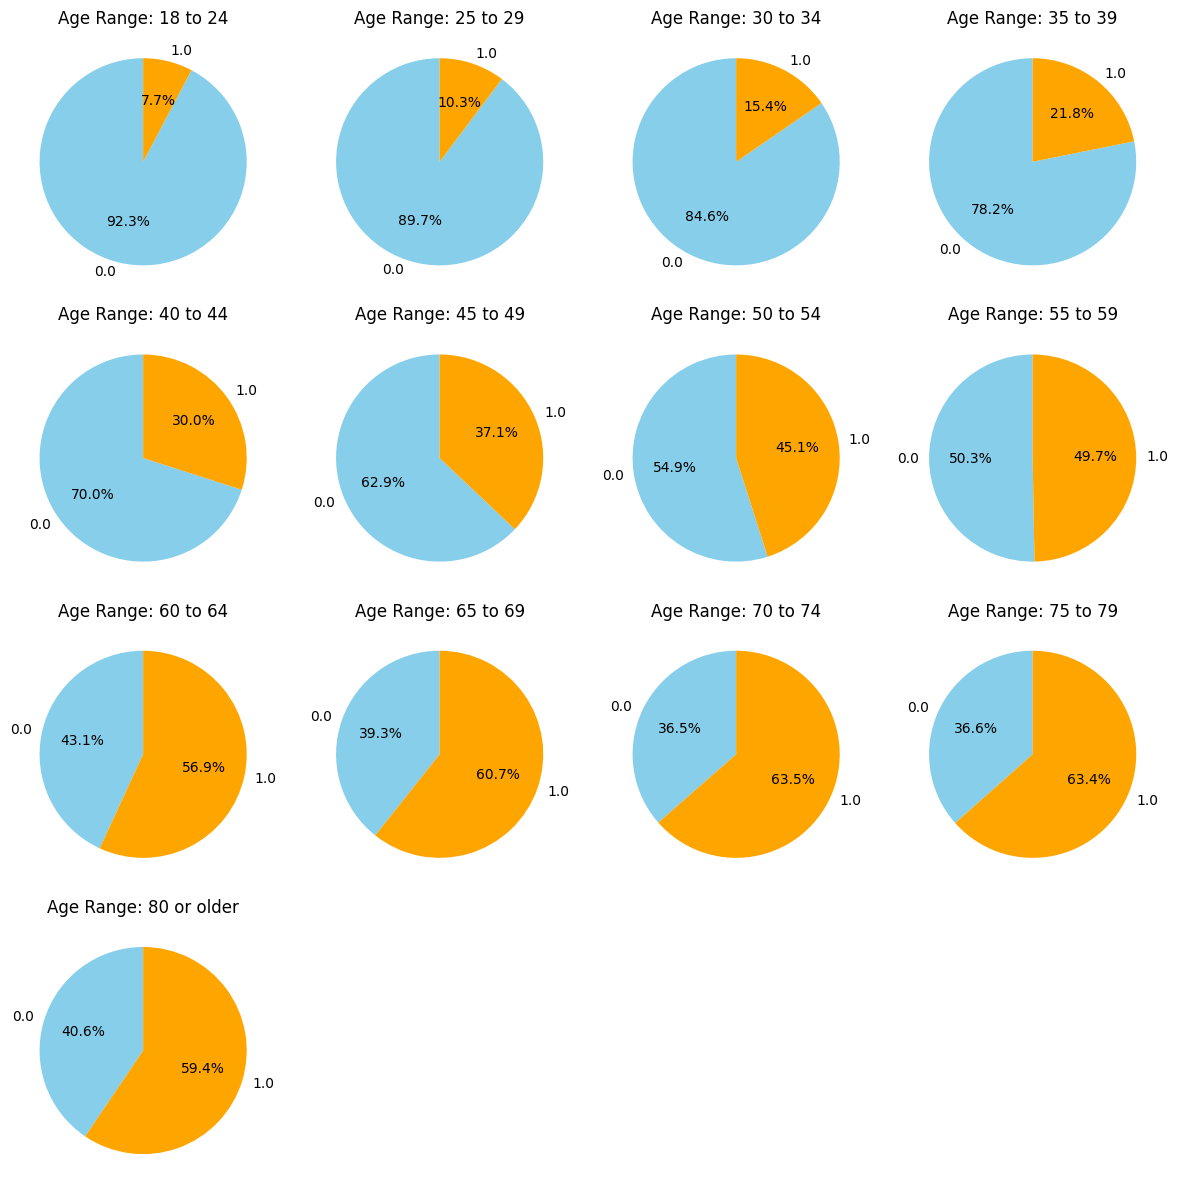

In [126]:
import math

age_diabetes_percentage = age_diabetes_distribution.div(age_diabetes_distribution.sum(axis=1), axis=0) * 100

num_age_ranges = len(age_diabetes_percentage)

rows = math.ceil(num_age_ranges / 4)
fig, axes = plt.subplots(rows, 4, figsize=(12, rows * 3), dpi=100)

axes = axes.flatten()

for i, age_range in enumerate(labels):
    data = age_diabetes_percentage.loc[labels.index(age_range)+1]
    axes[i].pie(data, labels=data.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'orange'])
    axes[i].set_title(f'Age Range: {age_range}')
    
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Visualizing Education Data

In [127]:
diabetes_train["Education"].describe()

count    56553.000000
mean         4.922551
std          1.030487
min          1.000000
25%          4.000000
50%          5.000000
75%          6.000000
max          6.000000
Name: Education, dtype: float64

In [128]:
education_count=diabetes_train["Education"].value_counts().sort_values()
education_count

Education
1.0       61
2.0     1322
3.0     2773
4.0    15525
5.0    15971
6.0    20901
Name: count, dtype: int64

In [129]:
education_levels = [
    "Never Attended School",
    "Elementary",
    "High School",
    "Some College Degree",
    "Advanced Degree",
    "6" 
]

<BarContainer object of 6 artists>

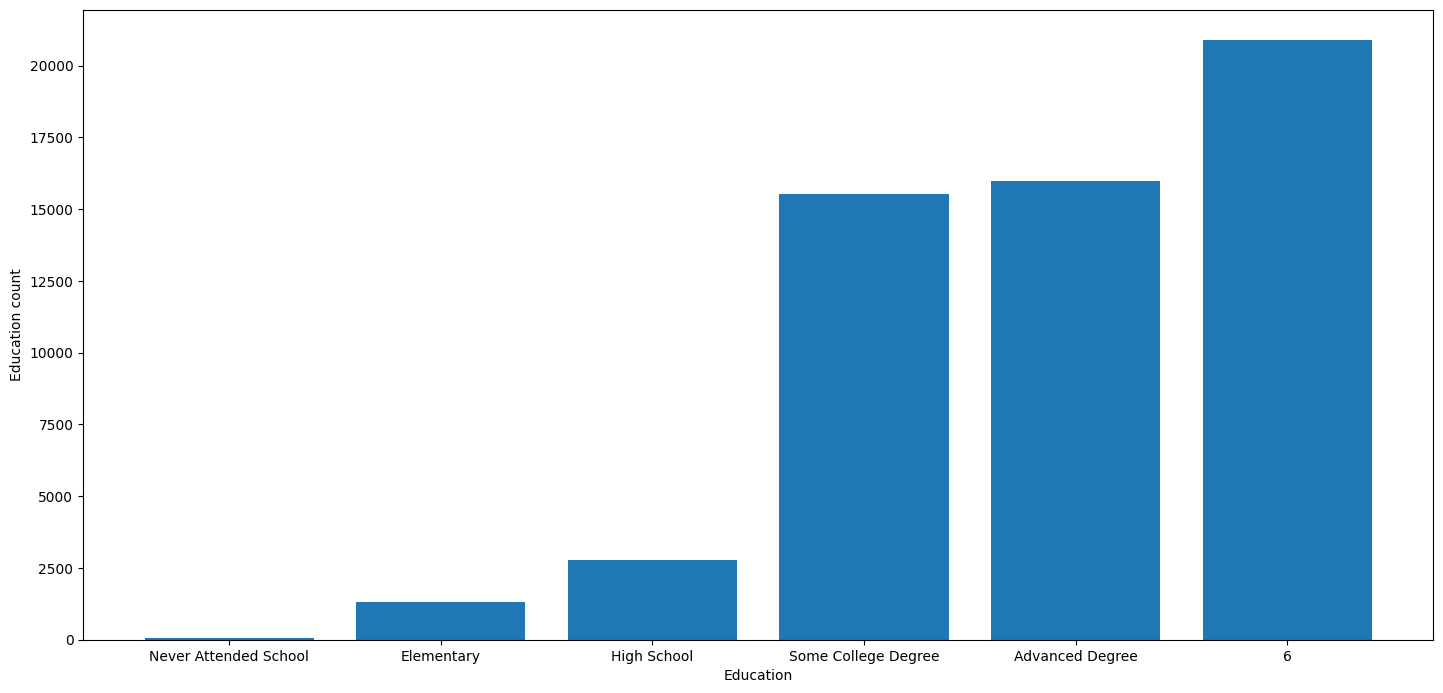

In [130]:
education_figer=plt.figure(figsize=(15,7),dpi=100)
education_axes=education_figer.add_axes([0.1,0.1,0.9,0.9])

education_axes.set_xlabel('Education')
education_axes.set_ylabel('Education count')

education_axes.bar(education_levels,education_count.values)

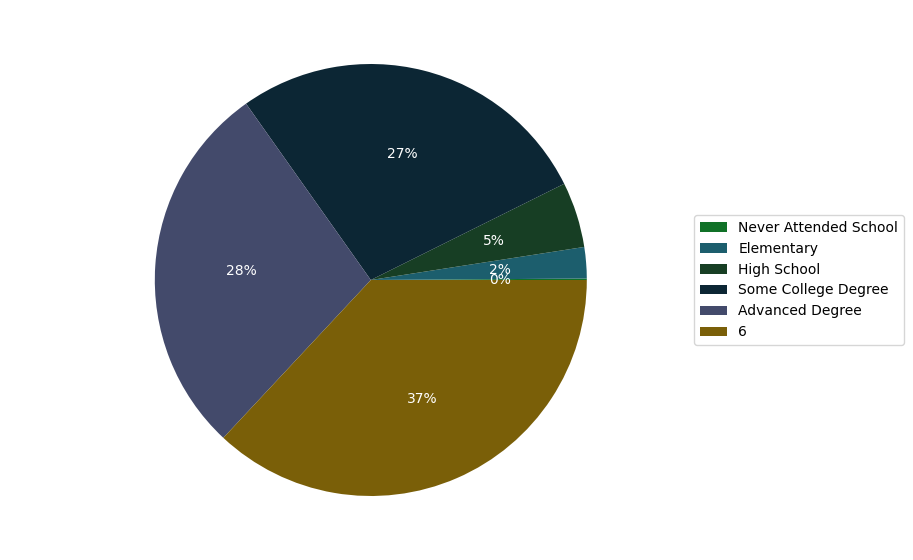

In [131]:
import random

education_figer=plt.figure(figsize=(20,6),dpi=100)
education_axes=education_figer.add_axes([0.1,0.1,0.9,0.9])

colors=[]
for i in range(education_count.size):
    rgb=(random.uniform(0,0.5),random.uniform(0,0.5),random.uniform(0,0.5))
    colors.append(rgb)


wedges, texts, autotexts=education_axes.pie(education_count.values,labels=education_levels,
                                      colors=colors,autopct="%1.0f%%",textprops=dict(color="w"))
plt.legend(wedges,education_levels,loc="right",bbox_to_anchor=(1,0,0.5,1))

plt.show()

In [132]:
education_diabetes_distribution =(
    diabetes_train.groupby(by=["Education","Diabetes_binary"])["Diabetes_binary"]
    .count()
    .unstack(fill_value=0)
)

education_diabetes_distribution

Diabetes_binary,0.0,1.0
Education,,
1.0,26,35
2.0,370,952
3.0,920,1853
4.0,6720,8805
5.0,7731,8240
6.0,12489,8412


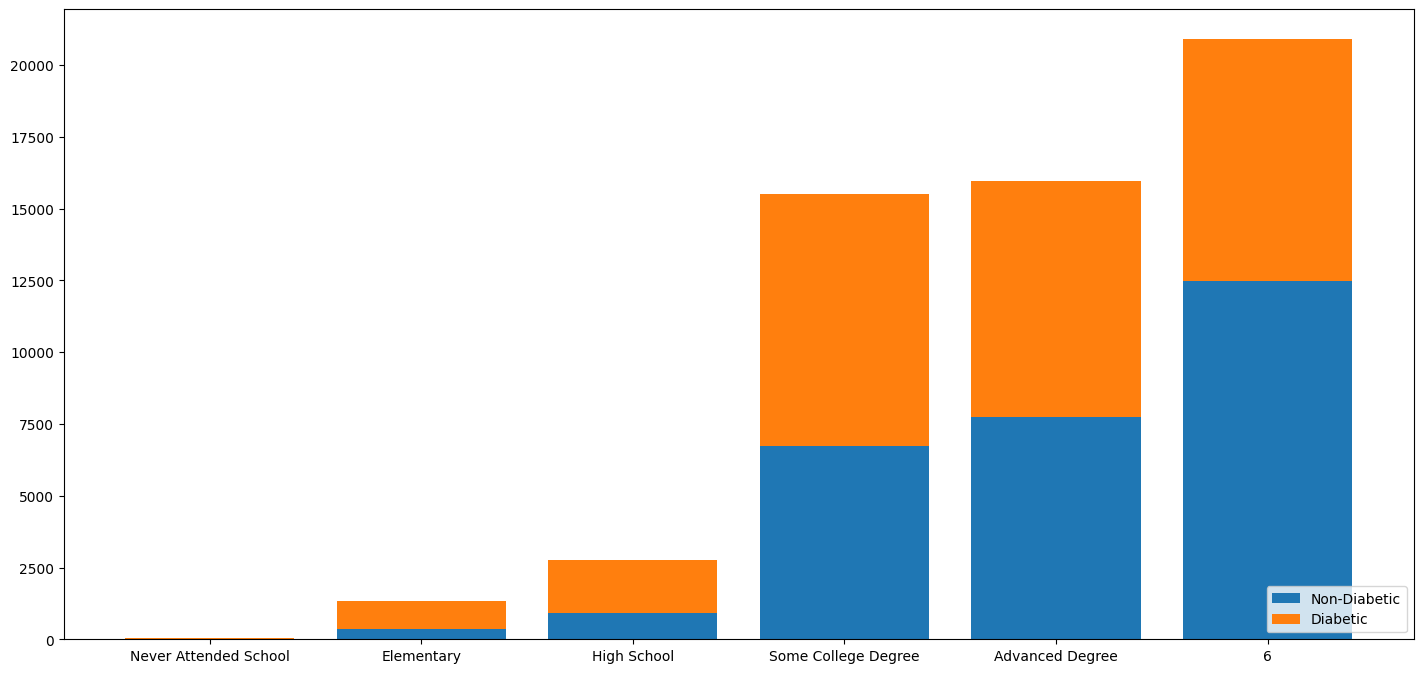

In [133]:
education_figer=plt.figure(figsize=(15,7),dpi=100)
education_axes=education_figer.add_axes([0.1,0.1,0.9,0.9])

education_axes.bar(education_levels,education_diabetes_distribution [0],label="Non-Diabetic")
education_axes.bar(education_levels,education_diabetes_distribution [1],label="Diabetic",bottom=education_diabetes_distribution [0])
plt.legend(loc="lower right")

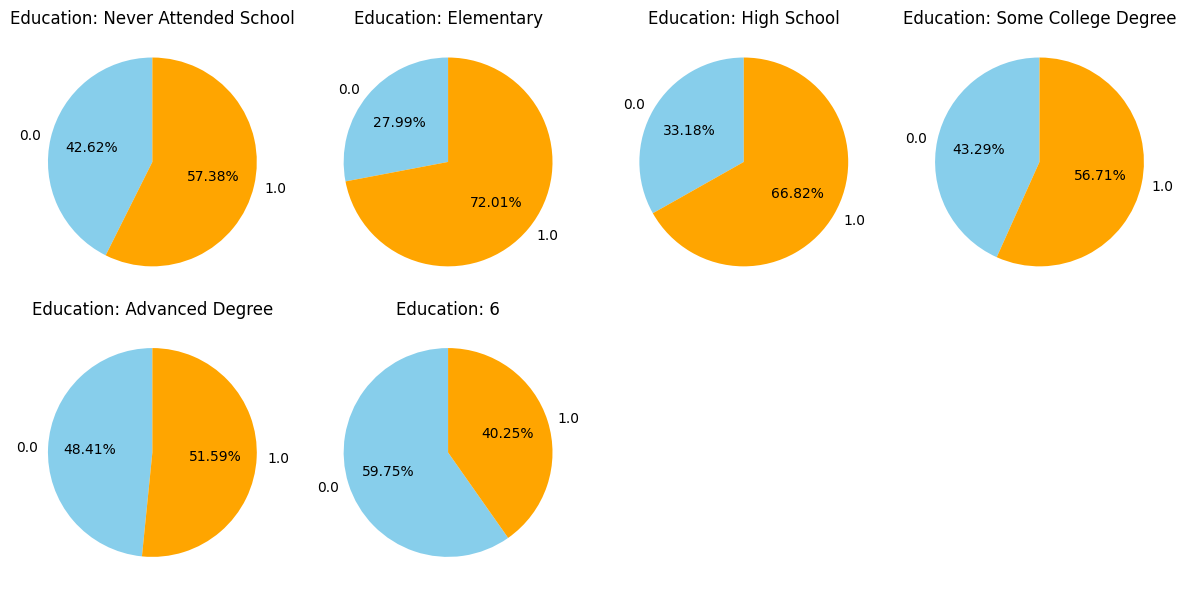

In [134]:
import math

education_diabetes_percentage = education_diabetes_distribution.div(education_diabetes_distribution.sum(axis=1), axis=0) * 100

num_education_ranges = len(education_diabetes_percentage)

rows = math.ceil(num_education_ranges / 4)
fig, axes = plt.subplots(rows, 4, figsize=(12, rows * 3), dpi=100)

axes = axes.flatten()

for i, education_range in enumerate(education_levels):
    data = education_diabetes_percentage.loc[education_levels.index(education_range)+1]
    axes[i].pie(data, labels=data.index, autopct='%0.2f%%', startangle=90, colors=['skyblue', 'orange'])
    axes[i].set_title(f'Education: {education_range}')
    
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## visualizing General Health data 

selecting the colors

In [135]:
colors = ['#66b3ff', '#ff6666']

### 1.histograms

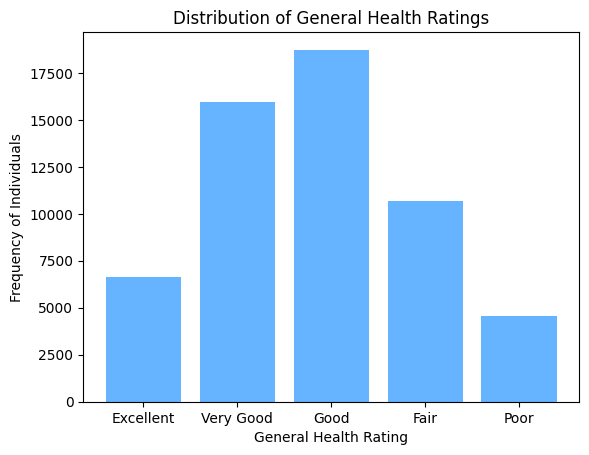

In [136]:
# Define the order of bins
ratings = ['Excellent', 'Very Good', 'Good', 'Fair', 'Poor']

# Calculate frequency and reindex
freq = diabetes_train["GenHlth"].value_counts().sort_index()

# Use bar chart instead of histogram
plt.bar(ratings, freq.values, color=colors[0])
plt.ylabel("Frequency of Individuals")
plt.xlabel("General Health Rating")
plt.title("Distribution of General Health Ratings")

plt.show()


### 2.bar chart

a bar chart that shows each general health rating with its number of occurances

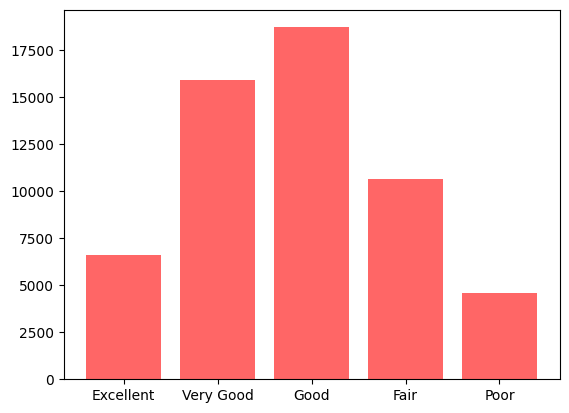

In [137]:
plt.bar(ratings, freq.values, color=colors[1])
plt.show()

a bar chart that shows each rating with its occurances, splitted to *'Diabetic'* and *'Non-Diabetic'*

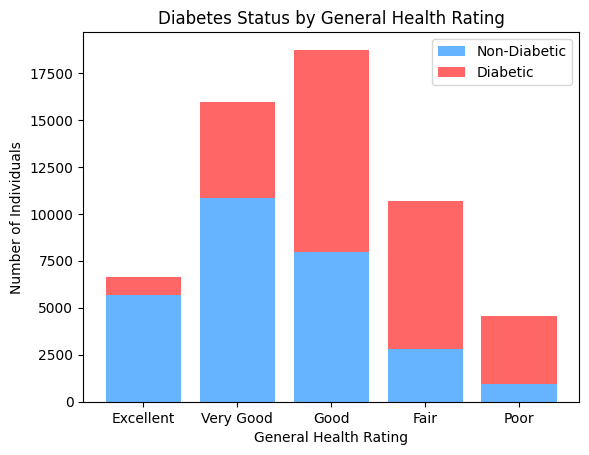

GenHlth  Diabetes_binary
1.0      0.0                 5704
         1.0                  926
2.0      0.0                10826
         1.0                 5124
3.0      0.0                 7965
         1.0                10766
4.0      0.0                 2792
         1.0                 7866
5.0      0.0                  969
         1.0                 3615
dtype: int64

In [138]:
group_sizes = diabetes_train.groupby(["GenHlth", "Diabetes_binary"]).size()

gen_hlth_diabetic= [int(group_sizes[i][1]) for i in freq.index]
gen_hlth_non_diabetic= [int(group_sizes[i][0]) for i in freq.index]

plt.bar(ratings, gen_hlth_non_diabetic, label='Non-Diabetic', color=colors[0])
plt.bar(ratings, gen_hlth_diabetic, bottom=gen_hlth_non_diabetic, label='Diabetic', color=colors[1])

#adding labels and title
plt.xlabel('General Health Rating')
plt.ylabel('Number of Individuals')
plt.title('Diabetes Status by General Health Rating')
plt.legend() #to show labels in the upper right corner
plt.show()
group_sizes

### 3.pie chart
each pie chart visualizes the proportion of diabetic and non-diabetic individuals in each health category, with the percentage distribution shown on the chart.

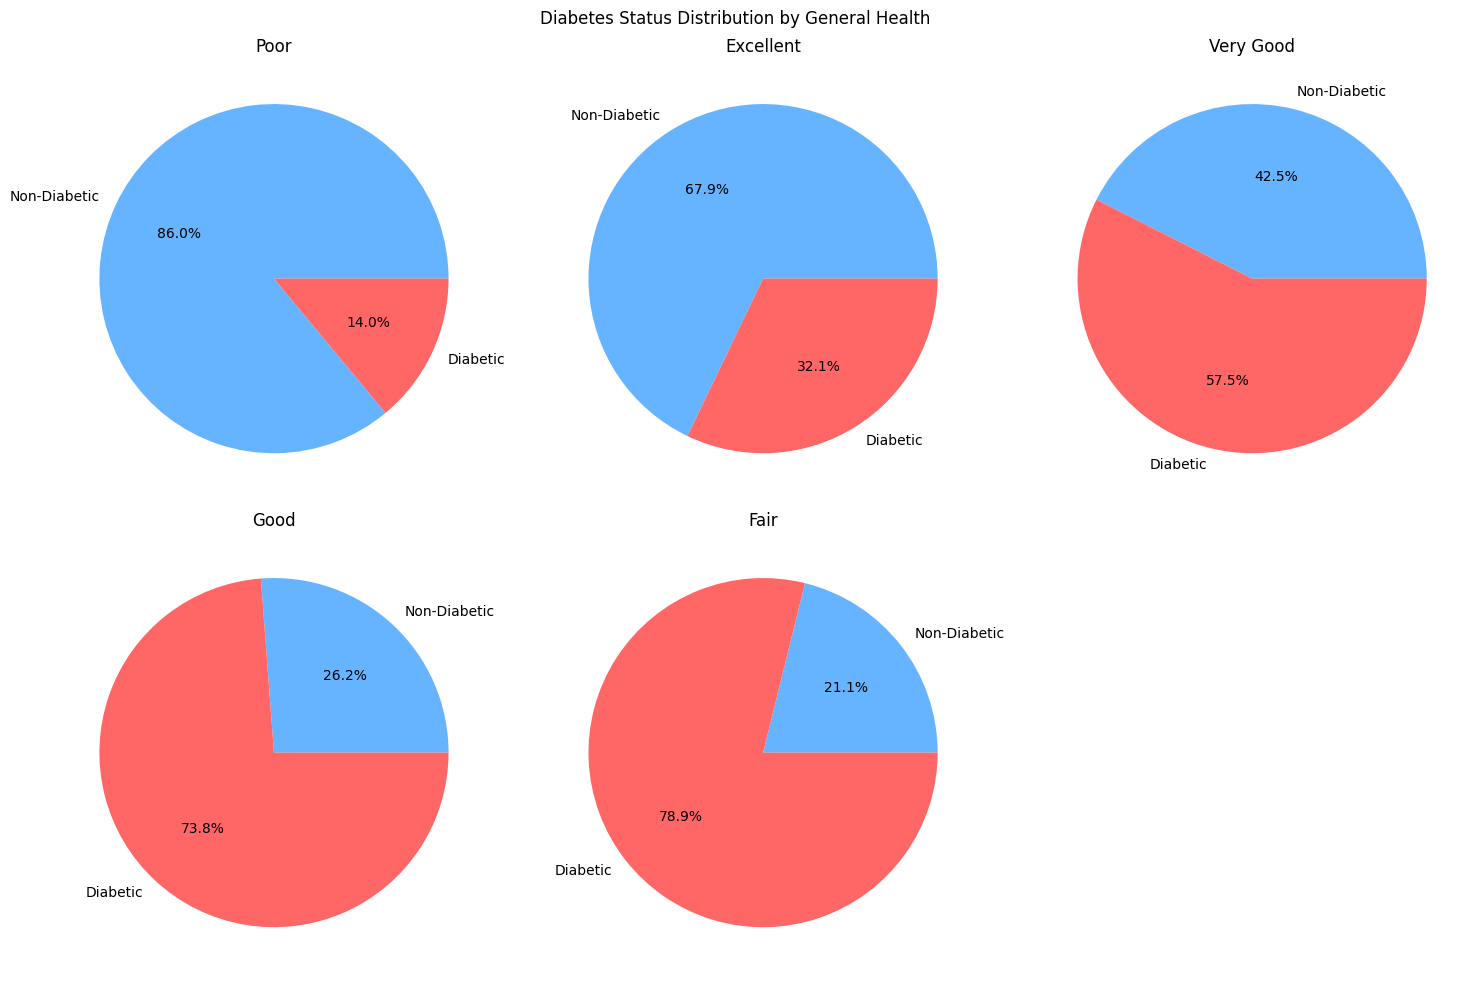

In [139]:
# Assuming you have the necessary data
num_plots = 5  # Number of pie charts to display
rows = 2  # Two rows
cols = 3  # Three columns

fig, axes = plt.subplots(rows, cols, figsize=(15, 10))  # Adjust figsize as needed

# Flatten axes array to easily index it
axes = axes.flatten()

for i, rating in enumerate(freq.index):
    ax = axes[i]  # Select the subplot
    ax.pie([int(group_sizes[rating][0]), int(group_sizes[rating][1])], 
           labels=["Non-Diabetic", "Diabetic"], autopct='%0.1f%%', colors=colors)
    ax.set_title(ratings[i-1])  # Use the updated categories

# Hide empty subplots (if any)
for i in range(num_plots, len(axes)):
    axes[i].axis('off')

fig.suptitle("Diabetes Status Distribution by General Health")
plt.tight_layout()  # Adjust spacing between subplots
plt.show()

### Visualizing BMI Data

In [140]:
bmi_count=diabetes_train["BMI"].value_counts().sort_index()

bmi_count

BMI
12.0     1
13.0     5
14.0     5
15.0    23
16.0    51
        ..
87.0    11
89.0     4
92.0     8
95.0     3
98.0     2
Name: count, Length: 76, dtype: int64

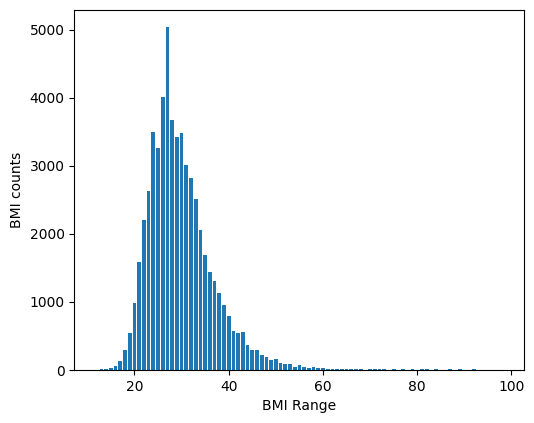

In [141]:
bmi_figer=plt.figure(figsize=(5,4),dpi=100)
bmi_axes=bmi_figer.add_axes([0.1,0.1,0.9,0.9])

bmi_axes.set_xlabel('BMI Range')
bmi_axes.set_ylabel('BMI counts')

bmi_axes.bar(bmi_count.index,bmi_count.values)

plt.show()

In [142]:
def remove_outliers(df, column_name):
    # Calculate the first and third quartiles (Q1 and Q3)
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    
    # Calculate the IQR (Interquartile Range)
    IQR = Q3 - Q1
    
    # Define the lower and upper bounds for acceptable values
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    print(lower_bound, upper_bound)
    
    # Remove rows where the value in the specified column is an outlier
    df_filtered = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]
    
    return df_filtered

# diabetes_train = remove_outliers(diabetes_train, "BMI")
# diabetes_train["BMI"].value_counts().sort_index()

### Visualizing Veggies data
if the individual consumes veggies at least once per day 

In [143]:
diabetes_train["Veggies"].value_counts()

Veggies
1.0    44642
0.0    11911
Name: count, dtype: int64

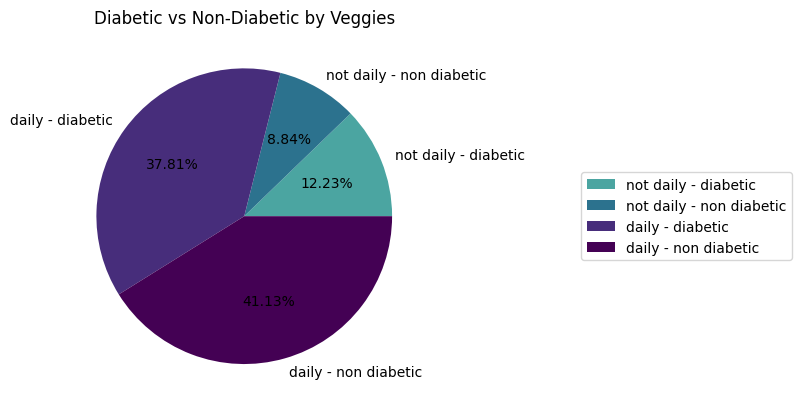

In [144]:
grouped_by_veggies = diabetes_train.groupby(["Veggies", "Diabetes_binary"]).size()
labels = ["not daily - diabetic", "not daily - non diabetic", "daily - diabetic", "daily - non diabetic"]
nums = [grouped_by_veggies[0][1], grouped_by_veggies[0][0], grouped_by_veggies[1][1], grouped_by_veggies[1][0]]
plt.pie(nums, labels=labels, autopct='%0.2f%%', colors=["#21908CCF", "#2C728EFF", "#472D7BFF", "#440154FF"])
plt.legend(loc="right",bbox_to_anchor=(1,0,1,1))
plt.title("Diabetic vs Non-Diabetic by Veggies")
plt.show()

### Visualizing Fruits data
if the individual consumes fruit at least once per day 

In [145]:
diabetes_train["Fruits"].value_counts()

Fruits
1.0    34716
0.0    21837
Name: count, dtype: int64

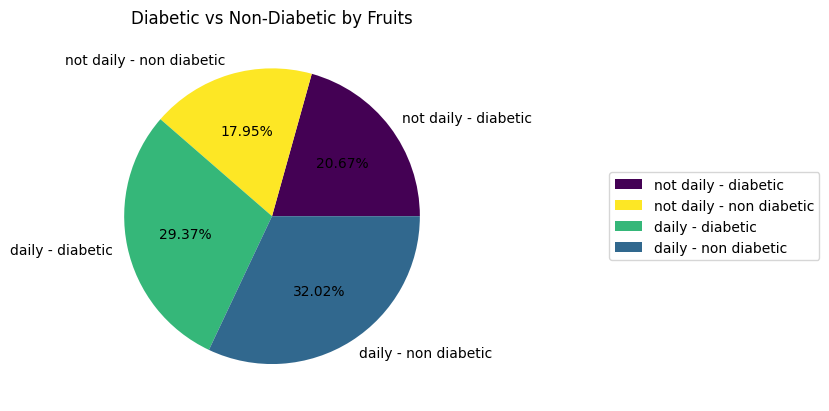

In [146]:
grouped_by_fruits = diabetes_train.groupby(["Fruits", "Diabetes_binary"]).size().sort_index()
nums = [grouped_by_fruits[0][1], grouped_by_fruits[0][0], grouped_by_fruits[1][1], grouped_by_fruits[1][0]]
plt.pie(nums, labels = labels, autopct='%0.2f%%', colors=["#440154FF", "#FDE725FF", "#35B779FF", "#31688EFF"])
plt.legend(loc="right",bbox_to_anchor=(1,0,1,1))
plt.title("Diabetic vs Non-Diabetic by Fruits")
plt.show()


### Drop ID,Income,and Education Columns

In [147]:
deleted_columns=["Income","Education"]

diabetes_train.drop(columns=deleted_columns,inplace=True)
diabetes_test.drop(columns=deleted_columns,inplace=True)

diabetes_train

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age
61789,1.0,1.0,0.0,1.0,25.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,4.0,0.0,3.0,0.0,1.0,11.0
46280,1.0,1.0,1.0,1.0,27.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,0.0,30.0,1.0,0.0,11.0
18465,0.0,1.0,0.0,1.0,27.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,4.0,10.0,27.0,1.0,0.0,8.0
45540,1.0,0.0,1.0,1.0,25.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,12.0
28119,0.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,3.0,0.0,2.0,1.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37194,1.0,1.0,0.0,1.0,28.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,11.0
6265,0.0,1.0,1.0,1.0,25.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0,9.0
54886,1.0,1.0,1.0,1.0,23.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,2.0,0.0,0.0,11.0
860,0.0,1.0,0.0,1.0,28.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0,10.0


### Correlation Coefficient

In [148]:
corr_matrix = diabetes_train.select_dtypes(include=[np.number]).corr()

corr_matrix

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age
Diabetes_binary,1.000000,0.382886,0.287534,0.115621,0.291590,0.084502,0.123665,0.210604,-0.157313,-0.055248,-0.082759,-0.096100,0.023039,0.041825,0.407638,0.086096,0.212298,0.272459,0.042273,0.280905
HighBP,0.382886,1.000000,0.317563,0.106344,0.242306,0.086716,0.127974,0.209114,-0.134490,-0.037714,-0.065844,-0.027953,0.039635,0.025160,0.319300,0.062393,0.172599,0.233235,0.039369,0.341610
HighChol,0.287534,0.317563,1.000000,0.087389,0.131357,0.094068,0.097168,0.180600,-0.087316,-0.044081,-0.043050,-0.025235,0.032385,0.031476,0.234627,0.081593,0.140472,0.160008,0.016303,0.246842
CholCheck,0.115621,0.106344,0.087389,1.000000,0.045804,-0.003160,0.023371,0.043281,-0.006069,0.022445,0.001642,-0.028367,0.110612,-0.064908,0.059505,-0.010602,0.033841,0.043929,-0.007716,0.103949
BMI,0.291590,0.242306,0.131357,0.045804,1.000000,0.006793,0.021766,0.060503,-0.173318,-0.083665,-0.056856,-0.060815,-0.012653,0.066304,0.266257,0.102662,0.160415,0.244313,-0.002945,-0.035443
Smoker,0.084502,0.086716,0.094068,-0.003160,0.006793,1.000000,0.062421,0.120887,-0.078454,-0.073686,-0.028725,0.077769,-0.011628,0.031334,0.151017,0.092693,0.122427,0.121062,0.109675,0.105482
Stroke,0.123665,0.127974,0.097168,0.023371,0.021766,0.062421,1.000000,0.217229,-0.078834,-0.009906,-0.045638,-0.022015,0.004763,0.036277,0.186821,0.085534,0.161294,0.190958,-0.001054,0.124883
HeartDiseaseorAttack,0.210604,0.209114,0.180600,0.043281,0.060503,0.120887,0.217229,1.000000,-0.091998,-0.018959,-0.034379,-0.039041,0.015544,0.035252,0.272646,0.071927,0.191955,0.231479,0.096567,0.222131
PhysActivity,-0.157313,-0.134490,-0.087316,-0.006069,-0.173318,-0.078454,-0.078834,-0.091998,1.000000,0.133252,0.147545,0.020143,0.029127,-0.062728,-0.273624,-0.131064,-0.234723,-0.276534,0.054302,-0.099442
Fruits,-0.055248,-0.037714,-0.044081,0.022445,-0.083665,-0.073686,-0.009906,-0.018959,0.133252,1.000000,0.235578,-0.033953,0.028507,-0.044478,-0.096448,-0.060317,-0.042423,-0.049491,-0.089226,0.062760


In [149]:
corr_matrix["Diabetes_binary"].sort_values(ascending=False)

Diabetes_binary         1.000000
GenHlth                 0.407638
HighBP                  0.382886
BMI                     0.291590
HighChol                0.287534
Age                     0.280905
DiffWalk                0.272459
PhysHlth                0.212298
HeartDiseaseorAttack    0.210604
Stroke                  0.123665
CholCheck               0.115621
MentHlth                0.086096
Smoker                  0.084502
Sex                     0.042273
NoDocbcCost             0.041825
AnyHealthcare           0.023039
Fruits                 -0.055248
Veggies                -0.082759
HvyAlcoholConsump      -0.096100
PhysActivity           -0.157313
Name: Diabetes_binary, dtype: float64

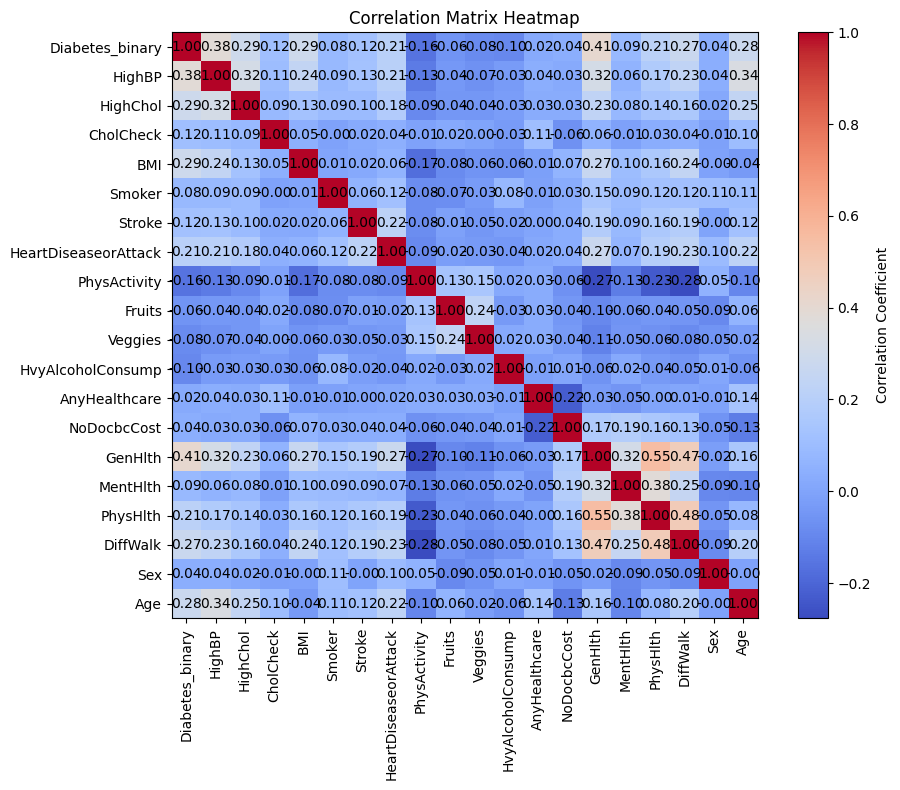

In [150]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='nearest')


plt.colorbar(label='Correlation Coefficient')


plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.index)), corr_matrix.index)


plt.title('Correlation Matrix Heatmap')

for i in range(len(corr_matrix.columns)):
    for j in range(len(corr_matrix.index)):
        plt.text(j, i, f"{corr_matrix.values[i, j]:.2f}", 
                 ha='center', va='center', color='black')

plt.tight_layout()
plt.show()


## Feature Scaling

### Normalizing BMI (MinMaxScaler)

In [151]:
from sklearn.preprocessing import MinMaxScaler

f=["BMI", "PhysHlth","MentHlth","Age","GenHlth"]

scaler = MinMaxScaler()
diabetes_train[f] = scaler.fit_transform(diabetes_train[f])
diabetes_test[f] = scaler.transform(diabetes_test[f])

### Models

In [155]:
train_data=diabetes_train
test_data=diabetes_test
train_label=train_data["Diabetes_binary"]
test_label=test_data["Diabetes_binary"]
train_data=train_data.drop("Diabetes_binary",axis=1)
test_data=test_data.drop("Diabetes_binary",axis=1)

### LogisticRegression Model

In [65]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression(random_state=42)

param_grid = [
    {
        "C": [0.1, 0.5, 1, 5, 10],  # Regularization strength
        "penalty": ["l1", "l2", "elasticnet"],  # Regularization type
        "solver": ["liblinear", "saga", "lbfgs"],  # Optimization algorithm
        "max_iter": [100, 200, 500],  # Maximum iterations
    }
]


grid_search=GridSearchCV(logistic_regression,param_grid,cv=5,return_train_score=True)
grid_search.fit(train_data,train_label)

print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

KeyboardInterrupt: 

In [ ]:
cvresult=grid_search.cv_results_

for mean_score,params in zip(cvresult["mean_test_score"],cvresult["params"]):
    print(np.sqrt(mean_score),params)

In [187]:
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression(random_state=42,max_iter=200,C=0.5)
model=logistic_regression.fit(train_data,train_label)

prediction=logistic_regression.predict(test_data)

In [188]:
from sklearn.model_selection import cross_val_score

cross_val=cross_val_score(logistic_regression,train_data,train_label,cv=5)
cross_val

array([0.74785607, 0.74334718, 0.75015472, 0.74969054, 0.74650752])

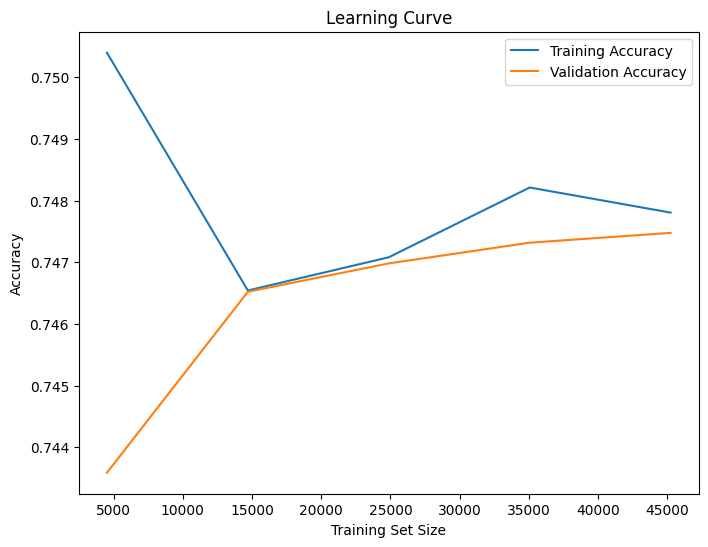

In [189]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    logistic_regression, train_data, train_label, cv=5, scoring='accuracy'
)

train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, label='Training Accuracy')
plt.plot(train_sizes, test_scores_mean, label='Validation Accuracy')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend()
plt.show()


### Plot Model Coefficients

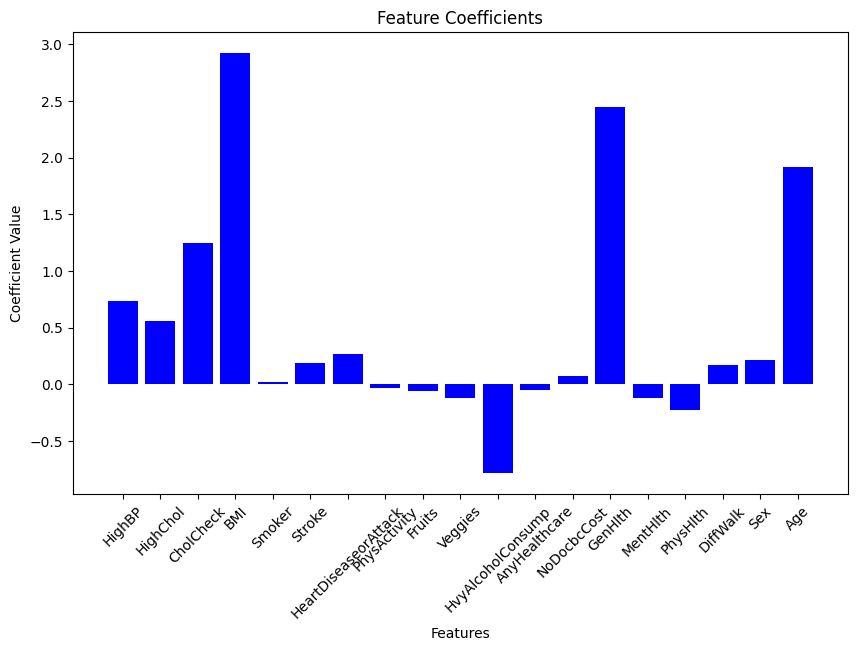

In [43]:
features = train_data.columns  
coefficients = logistic_regression.coef_.flatten()

plt.figure(figsize=(10, 6))
plt.bar(features, coefficients, color='blue')
plt.title('Feature Coefficients')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.xticks(rotation=45)
plt.show()


### Metrics Function

In [45]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,roc_auc_score

def calculate_metrics(y_true, y_pred):
    metrics={
        "Accuracy":accuracy_score(y_true,y_pred),
        "F1 Score":f1_score(y_true,y_pred),
        "Precision":precision_score(y_true,y_pred),
        "Recall":recall_score(y_true,y_pred),
        "ROC AUC":roc_auc_score(y_true,y_pred)
    }
    return metrics

### Logistic Regression Metrics

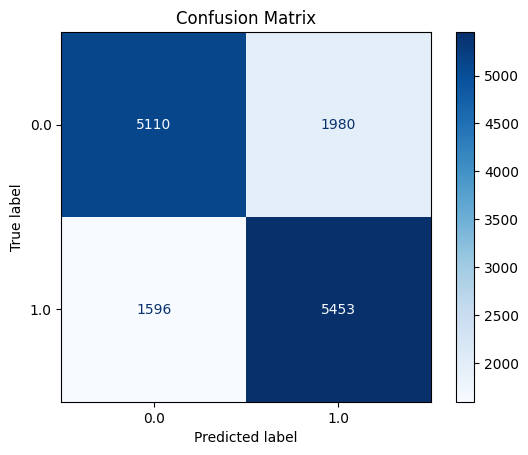

In [45]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(logistic_regression, test_data, test_label, cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

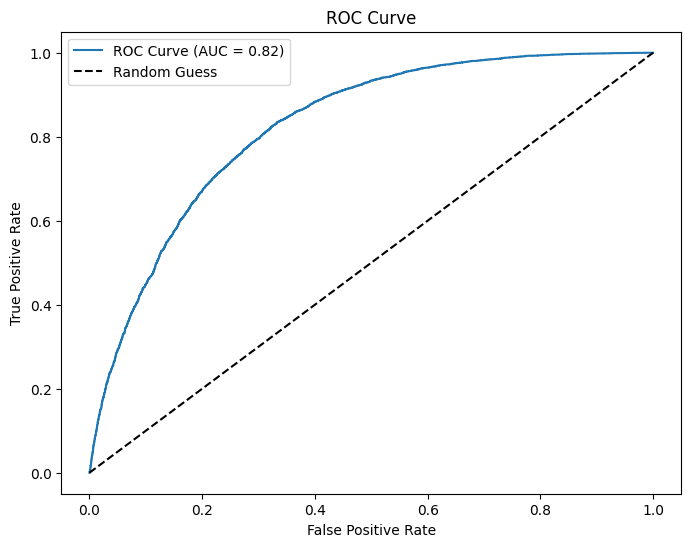

In [46]:
from sklearn.metrics import roc_curve, roc_auc_score

y_proba = logistic_regression.predict_proba(test_data)[:, 1]

fpr, tpr, _ = roc_curve(test_label, y_proba)
auc_score = roc_auc_score(test_label, y_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


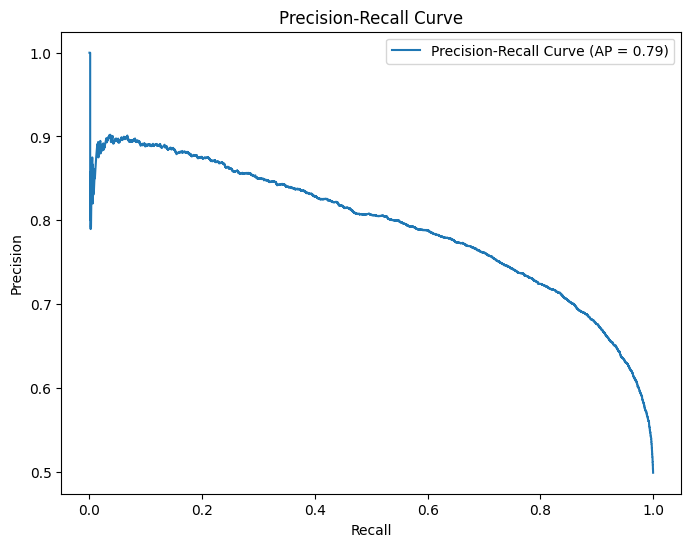

In [47]:
from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, _ = precision_recall_curve(test_label, y_proba)
average_precision = average_precision_score(test_label, y_proba)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Precision-Recall Curve (AP = {average_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


In [48]:
logistic_regression_metrics=calculate_metrics(test_label,prediction)

logistic_regression_metrics

{'Accuracy': 0.7470825376617866,
 'F1 Score': np.float64(0.753072780002762),
 'Precision': np.float64(0.7336203417193596),
 'Recall': np.float64(0.7735849056603774),
 'ROC AUC': np.float64(0.7471591665114299)}

### Save the logistic_regression model

In [ ]:
import os

os.makedirs("../models", exist_ok=True)
os.makedirs("../metrics", exist_ok=True)

In [ ]:
import joblib
joblib.dump(logistic_regression,'../models/logistic_regression.pkl')


In [ ]:
import json

with open("../metrics/logistic_regression.json","w") as f:
    json.dump(logistic_regression_metrics,f)

### Support Vector Machine

In [50]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Create an SVM classifier
svm_classifier = SVC(random_state=42)

# Define the parameter grid
param_grid = [
    {
        "C": [0.1, 1, 10, 100],  # Regularization parameter
        "kernel": ["poly", "rbf", "sigmoid"],  # Kernel type (removed 'linear')
        "degree": [2, 3, 4],  # Degree of the polynomial kernel (only relevant for 'poly' kernel)
        "gamma": ["scale", "auto"],  # Kernel coefficient for 'rbf', 'poly', and 'sigmoid'
        "max_iter": [200, 500,1000,2000],  # Maximum iterations
    }
]

# Perform grid search
grid_search = GridSearchCV(svm_classifier, param_grid, cv=5, return_train_score=True)
grid_search.fit(train_data, train_label)

# Print the best results
print("Best Accuracy:", grid_search.best_score_)
print("Best Estimator:", grid_search.best_estimator_)


C:\Users\GIGABYTE\Desktop\CAP\Machine Learning\project\work\diabetes-prediction\.venv\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\GIGABYTE\Desktop\CAP\Machine Learning\project\work\diabetes-prediction\.venv\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\GIGABYTE\Desktop\CAP\Machine Learning\project\work\diabetes-prediction\.venv\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\GIGABYTE\Desktop\CAP\Machine Learning\project\work\diabetes-prediction\.venv\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver termin

KeyboardInterrupt: 

In [210]:
from sklearn.svm import SVC,LinearSVC

# svc=SVC(kernel='rbf',random_state=42)
# model=svc.fit(train_data,train_label)
svc=LinearSVC(C=1,random_state=42)
model=svc.fit(train_data, train_label)

prediction=svc.predict(test_data)

In [211]:
cross_val=cross_val_score(svc,train_data,train_label,cv=10)
cross_val

array([0.75247525, 0.74345827, 0.7448727 , 0.74376658, 0.74677277,
       0.75349248, 0.75419982, 0.74217507, 0.74465075, 0.74783378])

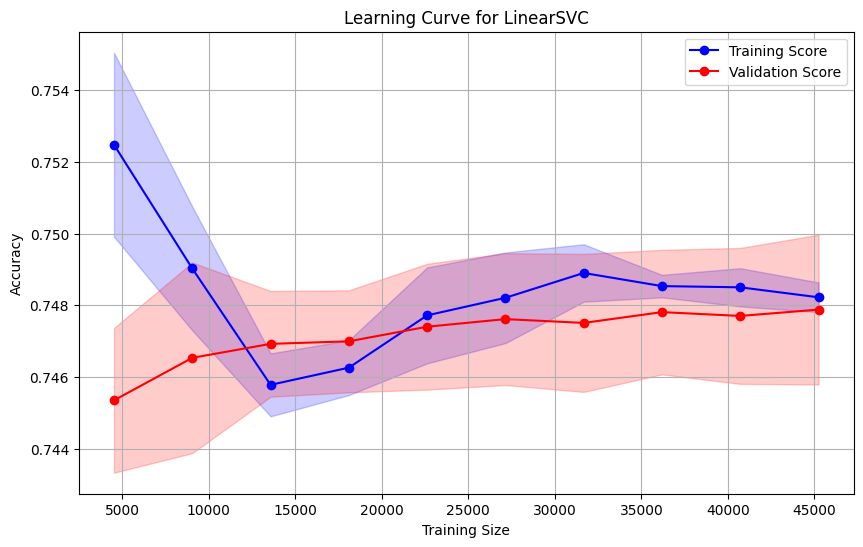

In [212]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, validation_scores = learning_curve(
    estimator=svc,
    X=train_data,  
    y=train_label, 
    cv=5,  
    scoring='accuracy',  
    train_sizes=np.linspace(0.1, 1.0, 10),  
    n_jobs=-1  
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
validation_mean = np.mean(validation_scores, axis=1)
validation_std = np.std(validation_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color="blue", label="Training Score")
plt.plot(train_sizes, validation_mean, 'o-', color="red", label="Validation Score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color="blue")
plt.fill_between(train_sizes, validation_mean - validation_std, validation_mean + validation_std, alpha=0.2, color="red")

plt.title("Learning Curve for LinearSVC")
plt.xlabel("Training Size")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid()
plt.show()

### SVM Metrics

In [209]:
svm_metrics=calculate_metrics(test_label,prediction)

svm_metrics

{'Accuracy': 0.746658179503501,
 'F1 Score': np.float64(0.7531357684355617),
 'Precision': np.float64(0.7323415091810749),
 'Recall': np.float64(0.7751454106965527),
 'ROC AUC': np.float64(0.7467405473793058)}

In [ ]:
import joblib
joblib.dump(logistic_regression,'../models/svm.pkl')

In [ ]:
import json

with open("../metrics/svm.json","w") as f:
    json.dump(svm_metrics,f)

### Desision Tree Model

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

decision_tree=DecisionTreeClassifier(random_state=42)

param_grid = {
    'max_depth': range(1, 10, 1),
    'min_samples_leaf': range(1, 20, 2),
    'min_samples_split': range(2, 20, 2),
    'criterion': ["entropy", "gini"]
}
grid_search = GridSearchCV(estimator=decision_tree, param_grid=param_grid, 
                           cv=5, verbose=True)
grid_search.fit(train_data, train_label)

print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

In [245]:
from sklearn.tree import DecisionTreeClassifier

decision_tree=DecisionTreeClassifier(random_state=42,min_samples_leaf=6,criterion='entropy',max_depth=6)

decision_tree.fit(train_data,train_label)

DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=6,
                       random_state=42)

In [246]:
from sklearn.model_selection import cross_val_score
cross_val=cross_val_score(decision_tree,train_data,train_label,cv=5)
cross_val

array([0.73945717, 0.73273804, 0.73556715, 0.73474801, 0.73916888])

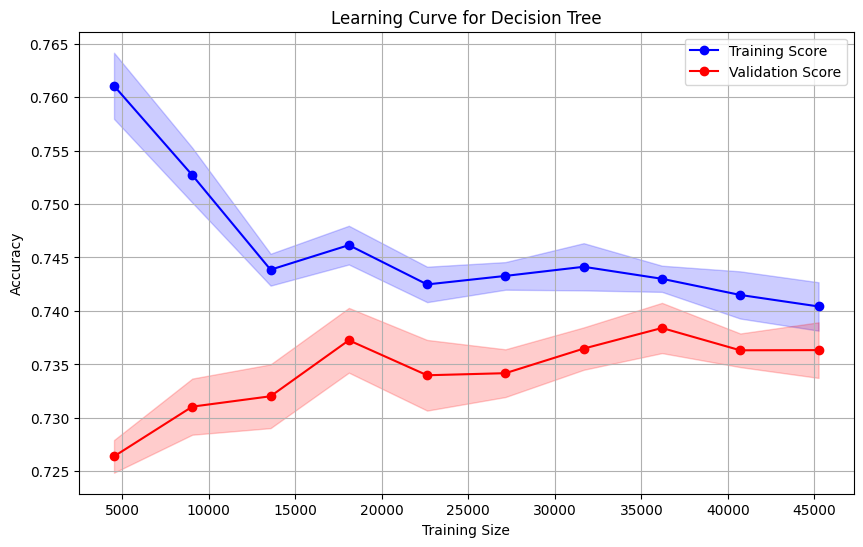

In [247]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, validation_scores = learning_curve(
    estimator=decision_tree,
    X=train_data,  
    y=train_label,  
    cv=5,
    scoring='accuracy', 
    train_sizes=np.linspace(0.1, 1.0, 10), 
    n_jobs=-1  
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
validation_mean = np.mean(validation_scores, axis=1)
validation_std = np.std(validation_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color="blue", label="Training Score")
plt.plot(train_sizes, validation_mean, 'o-', color="red", label="Validation Score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color="blue")
plt.fill_between(train_sizes, validation_mean - validation_std, validation_mean + validation_std, alpha=0.2, color="red")

plt.title("Learning Curve for Decision Tree")
plt.xlabel("Training Size")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid()
plt.show()


In [248]:
prediction=decision_tree.predict(test_data)

decision_tree_metrics=calculate_metrics(test_label,prediction)
decision_tree_metrics

{'Accuracy': 0.7385246481363604,
 'F1 Score': np.float64(0.7388571024934661),
 'Precision': np.float64(0.7357906584130557),
 'Recall': np.float64(0.7419492126542772),
 'ROC AUC': np.float64(0.7385345499096492)}

In [249]:
import joblib
joblib.dump(decision_tree,'../models/decision_tree.pkl')

['../models/decision_tree.pkl']

In [250]:
import json

with (open("../metrics/decision_tree.json","w") as f):
    json.dump(decision_tree_metrics,f)

### Random Forest model

In [40]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

random_forest = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid, 
                           cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

grid_search.fit(train_data, train_label)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


C:\Users\GIGABYTE\Desktop\CAP\Machine Learning\project\work\diabetes-prediction\.venv\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best parameters: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Best cross-validation score: 0.7480749690219629


In [174]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(random_state=42,bootstrap= True, max_depth=8,
max_features= 'sqrt', min_samples_leaf= 6, min_samples_split= 12, n_estimators= 100)


random_forest.fit(train_data, train_label)

RandomForestClassifier(max_depth=8, min_samples_leaf=6, min_samples_split=12,
                       random_state=42)

In [177]:
from sklearn.model_selection import cross_val_score
cross_val=cross_val_score(random_forest,train_data,train_label,cv=5)
cross_val

array([0.75024313, 0.74414287, 0.74829812, 0.74933687, 0.74429708])

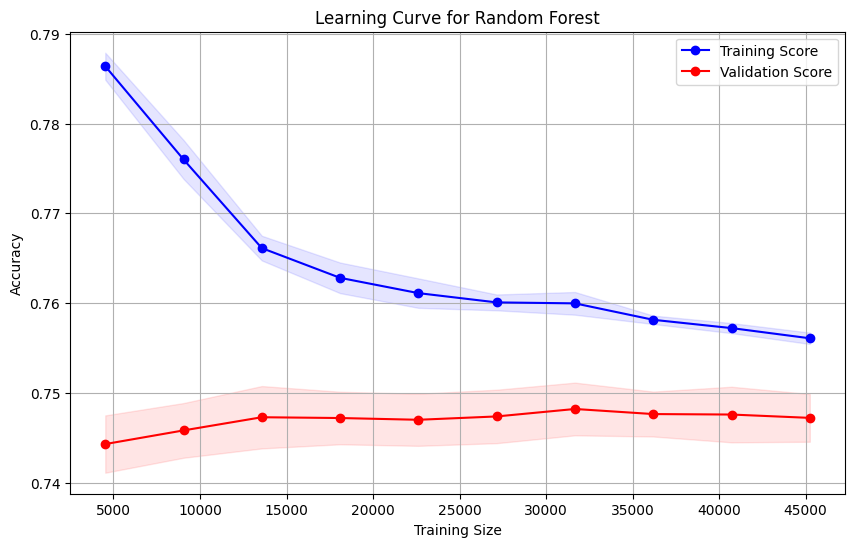

In [175]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, val_scores = learning_curve(
    random_forest, train_data, train_label, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color="b", label="Training Score")
plt.plot(train_sizes, val_mean, 'o-', color="r", label="Validation Score")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="blue", alpha=0.1)
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, color="red", alpha=0.1)

plt.title("Learning Curve for Random Forest")
plt.xlabel("Training Size")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid()
plt.show()


In [176]:
prediction=random_forest.predict(test_data)

random_forest_metrics=calculate_metrics(test_label,prediction)
random_forest_metrics

{'Accuracy': 0.748001980338072,
 'F1 Score': np.float64(0.7580962726593795),
 'Precision': np.float64(0.726953125),
 'Recall': np.float64(0.792027237906086),
 'ROC AUC': np.float64(0.7481292748063575)}

In [47]:
import joblib
joblib.dump(random_forest,'../models/random_forest.pkl')

['../models/random_forest.pkl']

In [48]:
import json

with open("../metrics/random_forest.json","w") as f:
    json.dump(random_forest_metrics,f)